In [13]:
# -*- coding: utf-8 -*-
"""
Created on Wed Dec 11 22:23:28 2019

@author: Prerna Prakash Gupta
"""
from dateutil.parser import parse 
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
#plt.rcParams.update({'figure.figsize': (10, 7), 'figure.dpi': 120})
import pandas as pd
import numpy as np
from patsy import dmatrices
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd
import numpy as np
from sklearn import preprocessing
scaler = preprocessing.StandardScaler()
import seaborn as sns  
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

# Import as Dataframe
data01=pd.read_csv(r"C:\Users\Prerna Prakash Gupta\Desktop\data-train1.csv")
data01.shape


(138241, 7)

In [2]:
#convert time coloum to date-time index
data01['Time']=pd.to_datetime(data01['Time'])
#check for missing values
data01.isna().sum()

Time                         0
BearingPressure(kPa)         1
PowerDraw(MW)                1
Speed(RPM)                   0
DilutionFlowRate(m3/h)       2
ConveyorBeltFeedRate(t/h)    2
ConveyorBeltPSDFines(%)      2
dtype: int64

In [3]:
#look at datatype
data01.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138241 entries, 0 to 138240
Data columns (total 7 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   Time                       138241 non-null  datetime64[ns]
 1   BearingPressure(kPa)       138240 non-null  float64       
 2   PowerDraw(MW)              138240 non-null  float64       
 3   Speed(RPM)                 138241 non-null  float64       
 4   DilutionFlowRate(m3/h)     138239 non-null  float64       
 5   ConveyorBeltFeedRate(t/h)  138239 non-null  float64       
 6   ConveyorBeltPSDFines(%)    138239 non-null  float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 7.4 MB


In [4]:
#set time as index and view the training data
data01.set_index('Time')

,BearingPressure(kPa),PowerDraw(MW),Speed(RPM),DilutionFlowRate(m3/h),ConveyorBeltFeedRate(t/h),ConveyorBeltPSDFines(%)
Time,,,,,,
2015-09-15 00:00:00,5488.175540,11.737357,7.843532,1030.590108,2935.660276,38.641018
2015-09-15 00:01:00,5423.930126,11.543755,7.681607,1039.869847,2928.333772,45.243656
2015-09-15 00:02:00,5502.058523,11.169525,7.514173,1033.237205,2919.128115,38.716221
2015-09-15 00:03:00,5477.862749,11.035091,7.592248,1035.075573,2985.500811,42.860703
2015-09-15 00:04:00,5508.013201,11.418827,7.784895,1042.189406,2905.052105,50.524544
...,...,...,...,...,...,...
2015-12-19 23:56:00,5291.038653,13.661863,8.709156,943.244733,2876.678675,50.263821
2015-12-19 23:57:00,5306.966515,13.610935,8.603212,976.361162,2813.859524,44.921227
2015-12-19 23:58:00,5260.321858,13.392879,8.405826,932.982467,2877.573304,40.478775


In [5]:
#since we are dealing with time series data, we linearly import missing values to preserve time consistency of the data
data01=data01.interpolate()

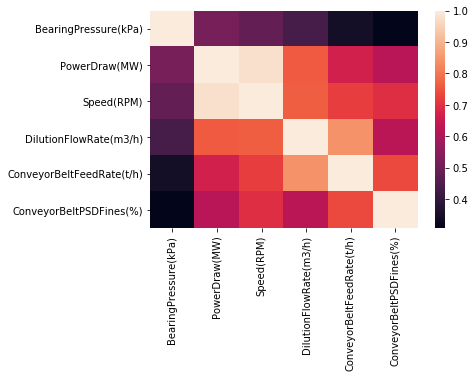

In [6]:
from string import ascii_letters
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Compute the correlation matrix
#control variable bearing pressure shows greatest correlation with power draw and speed
#power draw shows max relative correlation with speed and dilution flow rate
sns.heatmap(data01.corr())

In [6]:
#create performance variables in period t+5, by appending columns and shifting them 5 periods ahead
data01['bear-press-t+5']=data01.iloc[:, 1].shift(5)
data01['power-draw-t+5']=data01.iloc[:, 2].shift(5)

In [6]:
data01.head(10)


,Time,BearingPressure(kPa),PowerDraw(MW),Speed(RPM),DilutionFlowRate(m3/h),ConveyorBeltFeedRate(t/h),ConveyorBeltPSDFines(%)
0,2015-09-15 00:00:00,5488.175540,11.737357,7.843532,1030.590108,2935.660276,38.641018
1,2015-09-15 00:01:00,5423.930126,11.543755,7.681607,1039.869847,2928.333772,45.243656
2,2015-09-15 00:02:00,5502.058523,11.169525,7.514173,1033.237205,2919.128115,38.716221
3,2015-09-15 00:03:00,5477.862749,11.035091,7.592248,1035.075573,2985.500811,42.860703
4,2015-09-15 00:04:00,5508.013201,11.418827,7.784895,1042.189406,2905.052105,50.524544
5,2015-09-15 00:05:00,5487.269091,11.691652,7.940945,1033.363642,2947.060389,47.357365
6,2015-09-15 00:06:00,5480.270457,11.673803,7.803960,1044.653382,2888.786301,39.058037
7,2015-09-15 00:07:00,5483.381183,11.489922,7.675096,1018.984983,3008.546086,44.680573
8,2015-09-15 00:08:00,5487.186353,11.604724,7.842694,1040.442432,2892.440730,45.089081
9,2015-09-15 00:09:00,5453.889300,11.784436,7.880010,1043.509959,2990.030558,48.822273


In [7]:
#view summary statistics of the data
data01.describe()

,BearingPressure(kPa),PowerDraw(MW),Speed(RPM),DilutionFlowRate(m3/h),ConveyorBeltFeedRate(t/h),ConveyorBeltPSDFines(%)
count,138241.000000,138241.000000,138241.000000,138241.000000,138241.000000,138241.000000
mean,5361.523870,12.647911,8.010549,914.572136,2397.461267,39.530756
std,202.317640,2.680492,1.617348,253.076114,667.783938,9.964644
min,35.651295,-0.073347,0.000000,0.000000,0.000000,0.000000
25%,5288.403958,12.441997,8.057497,844.107699,2214.845016,36.440289
50%,5363.159017,13.228314,8.421999,954.845114,2595.094886,41.042423
75%,5450.906260,13.943625,8.677781,1052.036404,2816.978574,44.861343
max,5995.657529,14.965945,8.730035,1636.474899,3594.124010,84.740463


In [9]:
#drop the time column
data01 = data01.iloc[:, 1:]
#drop rows that have missing values due perfromance variables in time t+5 as nan in first five rows
data01=data01.dropna()
dataset = data01.values

In [10]:
data01.columns

Index(['BearingPressure(kPa)', 'PowerDraw(MW)', 'Speed(RPM)',
       'DilutionFlowRate(m3/h)', 'ConveyorBeltFeedRate(t/h)',
       'ConveyorBeltPSDFines(%)'],
      dtype='object')

In [11]:
#splipt data into train and validation set for hyper parameter tuning (80% train data, 20% validation data)
train_size = int(len(dataset) * 0.80)
val_size = len(dataset) - train_size

In [12]:
train, val = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
train.shape, val.shape

((110592, 6), (27649, 6))

In [ ]:
batch_size=50
for i in range(len(train)-batch_size+1):
    start = i*batch_size
    end = start+batch_size
    
    #batch data
    batch_data = transform_data[start:end]
    
    if(len(batch_data)!=batch_size):
        break

In [13]:
#training dataset
trainY=train[:,0:2]
trainX=train[:, 2:]
#validation dataset
valY=val[:,0:2]
valX=val[:, 2:]

In [14]:
#normalise the data in the 0-1 interval
#import libraries
import numpy as np
from skimage.util.shape import view_as_windows
import numpy
import matplotlib.pyplot as plt
from pandas import read_csv
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
trainX.shape
scaler = MinMaxScaler(feature_range=(0, 1))
trainY = scaler.fit_transform(trainY)
scaler1 = MinMaxScaler(feature_range=(0, 1))
trainX = scaler1.fit_transform(trainX)
scaler2 = MinMaxScaler(feature_range=(0, 1))
valX = scaler2.fit_transform(valX)
scaler3 = MinMaxScaler(feature_range=(0, 1))
valY = scaler3.fit_transform(valY)

Using TensorFlow backend.


In [15]:
trainY.shape, valY.shape

((110588, 2), (27648, 2))

In [16]:
trainX.shape, valX.shape

((110588, 6), (27648, 6))

In [163]:
#our feature variables consist of the performance variables at period t, in addition to control and feed variables (thus we have 6 feature variables)
#out target variables are performance variables at period t+5

In [18]:
#import libraries
import numpy as np
from skimage.util.shape import view_as_windows
import numpy
import matplotlib.pyplot as plt
from pandas import read_csv
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

Using TensorFlow backend.


In [17]:
#we use previous 15 periods of data in order to predict the dependent variables, (dependent variables in period t is a function of values in the past 15 periods of the feature variables)
#fit the train and validation data 15 periods back in optimal 3D numpy array format for LSTM model 
look_back = 15
n_features = 6
trainY = trainY[look_back:] # (train_size-look_back,)
valY = valY[look_back:] # ((n_sample-train_size),)
print(trainY.shape, valY.shape)
trainX = view_as_windows(trainX, (look_back,n_features))[:-1,0] # (train_size-look_back, look_back, n_features)
valX = view_as_windows(valX, (look_back,n_features))[:-1,0] # ((n_sample-train_size)-look_back, look_back, n_features)
print(trainX.shape, valX.shape)


(110573, 2) (27633, 2)
(110573, 15, 6) (27633, 15, 6)


In [18]:
#We create a LSTM model with 15 period lagged values of the feature set
# LSTM is suitable for processing and predicting data with time series. 
#When dealing with long run time series data, the series typically displays some discriminative patterns 
#in different time periods called shifting patterns. We are dealing with multi-variate sequential time series data. 
#The shifting patterns of these series contains noise, in addition to discriminative patterns, 
#hence requiring a highly sophisticated analysis. 
# LSTM assists in better uncovering discriminative patterns within each time window. For each time window that 
#starts from time t, the raw input features are represented within the time window as xt = {zt, zt+1,..., zt+w−1}. 
#Each time window t contains multi-variate features at several consecutive time steps,
#in order to extract more representative local patterns from each time window xt. The hidden representations 
#are denoted by ht, which is generated via an LSTM cell using both the raw features xt within the current time window 
#and the information from previous time window. Then the latent output pt is generated from ht. 
#The discriminative patterns typically follow specific temporal evolutionary process. 


In [176]:
import numpy
import matplotlib.pyplot as plt
from pandas import read_csv
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from keras.layers import Dropout


#we fit LSTM, and do a GRID SEARCH, with different cell units in LSTM layer and different epochs
#we calculate training and validation error for different hyperparameters
#we choose the optimal model which minimizes the validation error on the validation set
#as we increase the epochs, units, batchsize, while training error may fall, validation error might rise cause of over fitting,
#validation error will help us decipher the optimal model
units1=[5, 10, 15]
epochs1=[5, 15, 20]
y=[]
for i in units1:
    for j in epochs1:
        model = Sequential()
        model.add(LSTM(units = i, activation='relu', input_shape = (15, 6)))
        model.add(Dropout(0.2))
        model.add(Dense(2))
        model.compile(loss='mean_squared_error', optimizer='adam')
        print(model.summary())
        model.fit(trainX, trainY, epochs=j, batch_size=50, verbose=2)
        # make predictions
        trainPredict = model.predict(trainX)
        valPredict = model.predict(valX)
        trainPredict = scaler.inverse_transform(trainPredict)
        trainY1= scaler.inverse_transform(trainY) 
        valPredict = scaler3.inverse_transform(valPredict)
        valY1=scaler3.inverse_transform(valY)
        #root mean square error on training data
        trainScorebearpress = math.sqrt(mean_squared_error(trainY1[:,0], trainPredict[:, 0]))
        trainScorepowerdraw = math.sqrt(mean_squared_error(trainY1[:,1], trainPredict[:, 1]))
        #root mean square error on validation data
        valScorebearpress =math.sqrt(mean_squared_error(valY1[:,0], valPredict[:, 0]))
        valScorepowerdraw= math.sqrt(mean_squared_error(valY1[:,1], valPredict[:, 1]))
        y.append([i, j, trainScorebearpress, trainScorepowerdraw, valScorebearpress, valScorepowerdraw ])

 
   

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_15 (LSTM)               (None, 5)                 240       
_________________________________________________________________
dropout_15 (Dropout)         (None, 5)                 0         
_________________________________________________________________
dense_15 (Dense)             (None, 2)                 12        
Total params: 252
Trainable params: 252
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/5
 - 24s - loss: 0.0481
Epoch 2/5
 - 21s - loss: 0.0078
Epoch 3/5
 - 20s - loss: 0.0027
Epoch 4/5
 - 21s - loss: 0.0021
Epoch 5/5
 - 21s - loss: 0.0020
Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_16 (LSTM)               (None, 5)                 240       

Epoch 1/15
 - 23s - loss: 0.0403
Epoch 2/15
 - 22s - loss: 0.0027
Epoch 3/15
 - 22s - loss: 0.0012
Epoch 4/15
 - 22s - loss: 0.0011
Epoch 5/15
 - 23s - loss: 9.7655e-04
Epoch 6/15
 - 22s - loss: 9.0012e-04
Epoch 7/15
 - 22s - loss: 8.7815e-04
Epoch 8/15
 - 22s - loss: 8.2944e-04
Epoch 9/15
 - 22s - loss: 8.1867e-04
Epoch 10/15
 - 22s - loss: 7.8335e-04
Epoch 11/15
 - 24s - loss: 7.7034e-04
Epoch 12/15
 - 23s - loss: 7.6358e-04
Epoch 13/15
 - 23s - loss: 7.6860e-04
Epoch 14/15
 - 23s - loss: 7.3951e-04
Epoch 15/15
 - 23s - loss: 7.3025e-04
Model: "sequential_23"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_23 (LSTM)               (None, 15)                1320      
_________________________________________________________________
dropout_23 (Dropout)         (None, 15)                0         
_________________________________________________________________
dense_23 (Dense)             (None, 

In [177]:
#below we demonstrate the train and validation error for both performance variables, for different epochs and unit combinations
#we see with a rise in units and epochs,while training errorfalls for both variables, validation eror rises showing overfitting 
#The optimal model we choose is with 10 units and 20 epochs, where the validation error for bearing pressure is minimum at 210
#The validation error for power draw is minimum at 0.81

df = pd.DataFrame(y, columns = ['units', 'epochs', 'train-bearpress', 'train-powerdraw', 'val-bearpress', 'val-powerdraw'])
df


,units,epochs,train-bearpress,train-powerdraw,val-bearpress,val-powerdraw
0,5,5,175.062754,0.448526,336.793693,1.403178
1,5,15,182.229524,0.479720,334.186681,0.948654
2,5,20,163.920937,0.325605,313.982652,0.634763
3,10,5,185.319843,0.447058,335.902763,0.974279
4,10,15,151.842631,0.362196,316.064551,0.514829
5,10,20,105.410877,0.288708,209.954289,0.817058
6,15,5,110.595442,0.359841,269.796689,0.717711
7,15,15,91.795326,0.291812,195.519818,1.252412
8,15,20,94.181041,0.250515,192.426385,1.616184


In [19]:
#read the test data to evaluate the chosen LSTM model
data02=pd.read_csv(r"C:\Users\Prerna Prakash Gupta\Desktop\data_test.csv")
data02.shape
data02['bearingpressure5']=data02.iloc[:, 1].shift(5)
data02['powerdraw5']=data02.iloc[:, 2].shift(5)
data02 = data02.iloc[:, 1:]
data02=data02.dropna()
data02=data02
dataset = data02.values
testY2=dataset[:,0:2]
testX2=dataset[:, 2:]

#scale the test data
scaler = MinMaxScaler(feature_range=(0, 1))
testY2 = scaler.fit_transform(testY2)
scaler1 = MinMaxScaler(feature_range=(0, 1))
testX2 = scaler1.fit_transform(testX2)

#fit the test data 15 periods back in optimal 3D numpy array format for LSTM model 
look_back = 15
n_features = 6

testY2 = testY2[look_back:] # ((n_sample-train_size),)
testX2 = view_as_windows(testX2, (look_back,n_features))[:-1,0] # ((n_sample-train_size)-look_back, look_back, n_features)


In [20]:
testY2.shape, testX2.shape

((28781, 2), (28781, 15, 6))

In [21]:
import numpy
import matplotlib.pyplot as plt
from pandas import read_csv
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from keras.layers import Dropout
model = Sequential()
model.add(LSTM(units = 10, activation='relu', input_shape = (15, 6)))
model.add(Dropout(0.2))
model.add(Dense(2))
model.compile(loss='mean_squared_error', optimizer='adam')
print(model.summary())
model.fit(trainX, trainY, epochs=20, batch_size=50, verbose=2)
#predict the model on test data
testPredict = model.predict(testX2)
#invert scale test data predictions and actuals
testPredict=scaler.inverse_transform(testPredict)
testY2=scaler.inverse_transform(testY2)



Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 10)                680       
_________________________________________________________________
dropout_1 (Dropout)          (None, 10)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 22        
Total params: 702
Trainable params: 702
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/20
 - 14s - loss: 0.0649
Epoch 2/20
 - 14s - loss: 0.0033
Epoch 3/20
 - 12s - loss: 0.0018
Epoch 4/20
 - 14s - loss: 0.0015
Epoch 5/20
 - 16s - loss: 0.0013
Epoch 6/20
 - 16s - loss: 0.0012
Epoch 7/20
 - 14s - loss: 0.0012
Epoch 8/20
 - 14s - loss: 0.0012
Epoch 9/20
 - 14s - loss: 0.0010
Epoch 10/20
 - 16s - loss: 9.9124e-04
Epoch 11/20
 - 14s - loss: 9.6330e-04
Epoch 12

In [22]:

testScorebearpress = math.sqrt(mean_squared_error(testY2[:,0], testPredict[:, 0]))
testScorepowerdraw = math.sqrt(mean_squared_error(testY2[:,1], testPredict[:, 1]))


In [23]:
#RMSE for test data for bearing pressure
testScorebearpress

253.09138407611863

In [24]:
#RMSE for test data for power draw
testScorepowerdraw 

6.243629641599605

In [28]:
#testerror for bearing-pessure
testerror_bp=testPredict[:, 0]-testY2[:,0]
testerror_bp=pd.Series(testerror_bp)
#testerror for power draw
testerror_pd=testPredict[:, 1]-testY2[:,1]
testerror_pd=pd.Series(testerror_pd)

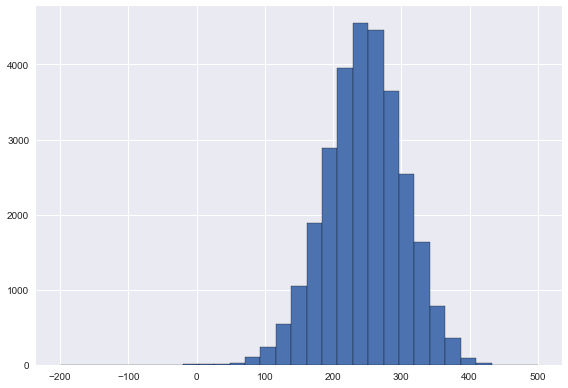

In [29]:
#plotting historgram for test error for bearing pressure
#relative to baseline prediction, our test error histogram shows larger variance, with majority observations 
#overestimating the bearing pressure by 300
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# in the base case 
plt.style.use("seaborn")
testerror_bp.hist(bins=31, range=(-200, 500), edgecolor="k")
plt.tight_layout()

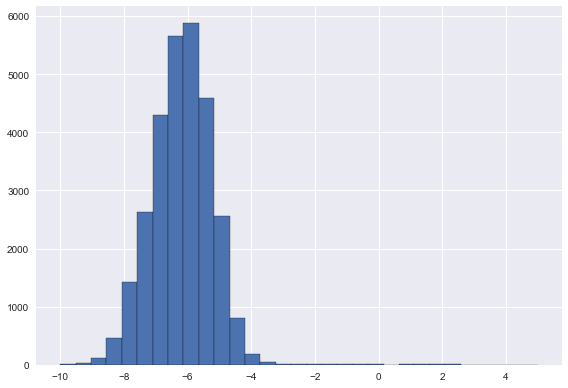

In [31]:
#plotting historgram for test error for power-draw
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#relative to baseline prediction, our test error histogram shows larger variance, with majority observations 
#underestimating the powerdraw by 5
plt.style.use("seaborn")
testerror_pd.hist(bins=31, range=(-10, 5), edgecolor="k")
plt.tight_layout()
